------------------------------------

Education:
0        working on college/university
1                working on space camp
2       graduated from masters program
3        working on college/university
4    graduated from college/university
Name: education, dtype: object

------------------------------------

Jobs:
other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather n

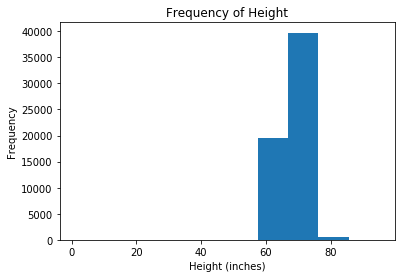


------------------------------------



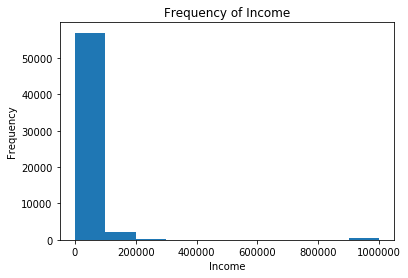


------------------------------------



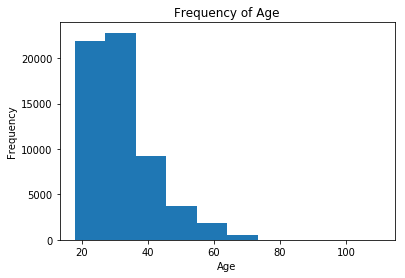


------------------------------------

Prediction of using Naive Bayes Classifier:
[-1 -1 -1 ... -1 -1 -1]

------------------------------------

Time to run above model (ms):
0.016031980514526367

------------------------------------

Prediction of Probability using Naive Bayes Classifier:
[[7.76207629e-01 6.27822367e-02 2.03192699e-02 ... 2.53365304e-03
  1.07335823e-03 1.13380443e-02]
 [7.91923304e-01 5.21391353e-02 2.05963856e-02 ... 2.39701915e-03
  5.40840746e-04 8.92828283e-03]
 [7.85683267e-01 5.33536594e-02 2.00109423e-02 ... 2.50194188e-03
  7.09364683e-04 9.19645721e-03]
 ...
 [7.86234524e-01 5.62552427e-02 2.13521824e-02 ... 2.41044518e-03
  5.79983230e-04 9.03254561e-03]
 [7.81902478e-01 5.50311894e-02 2.01115454e-02 ... 2.53617137e-03
  7.77586294e-04 9.26149314e-03]
 [7.85025491e-01 5.30079700e-02 1.98141048e-02 ... 2.52591003e-03
  7.39912820e-04 9.18506387e-03]]

------------------------------------

Accuracy of Naive Bayes Classifier:
0.7796574987026466

-------------

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



------------------------------------

Prediction using K-Nearest Classifier:
[-1 -1 -1 ... -1 -1 -1]

------------------------------------

Time to run above model (ms):
0.29674291610717773

------------------------------------

Prediction of Probability using K-Nearest Classifier:
[[0.77777778 0.         0.         ... 0.         0.         0.22222222]
 [0.88888889 0.         0.         ... 0.         0.         0.        ]
 [1.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.88888889 0.11111111 0.         ... 0.         0.         0.        ]
 [0.88888889 0.         0.         ... 0.         0.         0.        ]
 [0.77777778 0.         0.         ... 0.         0.         0.11111111]]

------------------------------------

Accuracy of K-Nearest Classifier:
0.775609756097561

------------------------------------

Precision of K-Nearest Classifier:
[0.78044184 0.26760563 0.         0.         0.         0.
 0.         0.         0.         0.         0. 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:464: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


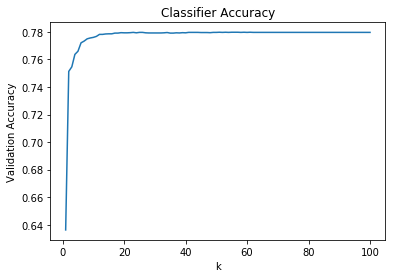

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

#Create your df here:
df = pd.read_csv("profiles.csv")
#df_states = pd.read_csv("states.csv")


# Exploring the data
explore_education = df.education.head()
print("------------------------------------\n")
print("Education:")
print(explore_education)

job_responses = df.job.value_counts()
print("\n------------------------------------\n")
print("Jobs:")
print(job_responses)


# Visualizing some data
# Height
plt.hist(df.height.dropna())
plt.xlabel("Height (inches)")
plt.ylabel("Frequency")
plt.title("Frequency of Height")
#plt.xlim(50, 100)
print("\n------------------------------------\n")
plt.show()

#Income
plt.hist(df.income.dropna())
#plt.hist(df.income.dropna())
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.title("Frequency of Income")
print("\n------------------------------------\n")
plt.show()

#Age
plt.hist(df.age.dropna())
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Frequency of Age")
print("\n------------------------------------\n")
plt.show()


# Formulate a Question
# Location, Income, Job, education, & ethnicity?

education_mapping = {"graduated from college/university": 0,
                    "graduated from masters program":1,
                    "working on college/university": 2,
                    "working on college/university": 3,
                    "working on masters program": 4,
                    "graduated from two-year college": 5,
                    "graduated from high school": 6,
                    "graduated from ph.d program": 7,
                    "graduated from law school": 8,
                    "working on two-year college": 9,
                    "dropped out of college/university": 10,
                    "working on ph.d program": 11,
                    "college/university": 12,
                    "graduated from space camp": 13,
                    "dropped out of space camp": 14,
                    "graduated from med school": 15,
                    "working on space camp": 16,
                    "working on law school": 17,
                    "two-year college": 18,
                    "working on med school": 19,
                    "dropped out of two-year college": 20,
                    "dropped out of masters program": 21,
                    "masters program": 22,
                    "dropped out of ph.d program": 23,
                    "dropped out of high school": 24,
                    "high school": 6,
                    "working on high school": 25,
                    "space camp": 26,
                    "ph.d program": 27,
                    "law school": 28,
                    "dropped out of law school": 29,
                    "dropped out of med school": 30,
                    "med school": 31}
df["education_code"] = df.education.map(education_mapping)

location_mapping = {"south san francisco, california":1,
                    "oakland, california":2,
                    "san francisco, california":3,
                    "berkeley, california":4,
                    "belvedere tiburon, california":5,
                    "san mateo, california":6,
                    "daly city, california":7,
                    "san leandro, california":8,
                    "atherton, california":9,
                    "san rafael, california":10,
                    "walnut creek, california":11,
                    "menlo park, california":12,
                    "belmont, california":13,
                    "san jose, california":14,
                    "palo alto, california":15,
                    "emeryville, california":16,
                    "el granada, california":17,
                    "castro valley, california":18,
                    "fairfax, california":19,
                    "mountain view, california":20,
                    "burlingame, california":21,
                    "martinez, california":22,
                    "pleasant hill, california":23,
                    "hayward, california":24,
                    "alameda, california":25,
                    "vallejo, california":26,
                    "benicia, california":27,
                    "el cerrito, california":28,
                    "mill valley, california":29,
                    "richmond, california":30,
                    "redwood city, california":31,
                    "el sobrante, california":32,
                    "stanford, california":33,
                    "san pablo, california":34,
                    "novato, california":35,
                    "pacifica, california":36,
                    "lafayette, california":37,
                    "half moon bay, california":38,
                    "fremont, california":39,
                    "orinda, california":40,
                    "san anselmo, california":41,
                    "corte madera, california":42,
                    "albany, california":43,
                    "san carlos, california":44,
                    "san lorenzo, california":45,
                    "foster city, california":46,
                    "hercules, california":47,
                    "santa cruz, california":48,
                    "bolinas, california":49,
                    "sausalito, california":50,
                    "millbrae, california":51,
                    "larkspur, california":52,
                    "moraga, california":53,
                    "san bruno, california":54,
                    "petaluma, california":55,
                    "pinole, california":56,
                    "san geronimo, california":57,
                    "crockett, california":58,
                    "boulder, colorado":59,
                    "brisbane, california":60,
                    "freedom, california":61,
                    "montara, california":62,
                    "green brae, california":63,
                    "woodside, california":64,
                    "new york, new york":65,
                    "ross, california":66,
                    "east palo alto, california":67,
                    "san quentin, california":68,
                    "portland, oregon":69,
                    "rodeo, california":70,
                    "hacienda heights, california":71,
                    "woodacre, california":72,
                    "westlake, california":73,
                    "riverside, california":74,
                    "rohnert park, california":75,
                    "sacramento, california":76,
                    "point richmond, california":77,
                    "san diego, california":78,
                    "canyon country, california":79,
                    "tucson, arizona":80,
                    "honolulu, hawaii":81,
                    "billings, montana":82,
                    "west oakland, california":83,
                    "kentfield, california":84,
                    "milwaukee, wisconsin":85,
                    "woodbridge, virginia":86,
                    "glencove, california":87,
                    "tiburon, california":88,
                    "madrid, spain":89,
                    "las vegas, nevada":90,
                    "peoria, illinois":91,
                    "santa monica, california":92,
                    "bellwood, illinois":93,
                    "los angeles, california":94,
                    "moss beach, california":95,
                    "nha trang, vietnam":96,
                    "hillsborough, california":97,
                    "olema, california":98,
                    "union city, california":99,
                    "colma, california":100,
                    "cork, ireland":101,
                    "new orleans, louisiana":102,
                    "kensington, california":103,
                    "redwood shores, california":104,
                    "utica, michigan":105,
                    "brea, california":106,
                    "lagunitas, california":107,
                    "stinson beach, california":108,
                    "santa clara, california":109,
                    "studio city, california":110,
                    "concord, california":111,
                    "piedmont, california":112,
                    "grand rapids, michigan":113,
                    "seaside, california":114,
                    "leander, texas":115,
                    "forest knolls, california":116,
                    "edinburgh, united kingdom":117,
                    "magalia, california":118,
                    "london, united kingdom":119,
                    "astoria, new york":120,
                    "chicago, illinois":121,
                    "orange, california":122,
                    "south wellfleet, massachusetts":123,
                    "bayshore, california":124,
                    "asheville, north carolina":125,
                    "los gatos, california":126,
                    "boise, idaho":127,
                    "islip terrace, new york":128,
                    "sunnyvale, california":129,
                    "cambridge, massachusetts":130,
                    "lake orion, michigan":131,
                    "ozone park, new york":132,
                    "jackson, mississippi":133,
                    "ashland, california":134,
                    "south orange, new jersey":135,
                    "fort lauderdale, florida":136,
                    "minneapolis, minnesota":137,
                    "pasadena, california":138,
                    "atlanta, georgia":139,
                    "salt lake city, utah":140,
                    "arcadia, california":141,
                    "milpitas, california":142,
                    "san antonio, texas":143,
                    "port costa, california":144,
                    "nicasio, california":145,
                    "livingston, california":146,
                    "bellingham, washington":147,
                    "crowley, texas":148,
                    "boston, massachusetts":149,
                    "longwood, florida":150,
                    "fayetteville, west virginia":151,
                    "granite bay, california":152,
                    "isla vista, california":153,
                    "hilarita, california":154,
                    "campbell, california":155,
                    "stratford, connecticut":156,
                    "santa ana, california":157,
                    "santa rosa, california":158,
                    "kula, hawaii":159,
                    "murfreesboro, tennessee":160,
                    "brooklyn, new york":161,
                    "north hollywood, california":162,
                    "nevada city, california":163,
                    "providence, rhode island":164,
                    "stockton, california":165,
                    "marin city, california":166,
                    "washington, district of columbia":167,
                    "waterford, california":168,
                    "vancouver, british columbia, canada":169,
                    "muir beach, california":170,
                    "pacheco, california":171,
                    "irvine, california":172,
                    "kansas city, missouri":173,
                    "kassel, germany":174,
                    "canyon, california":175,
                    "philadelphia, pennsylvania":176,
                    "oceanview, california":177,
                    "long beach, new york":178,
                    "amsterdam, netherlands":179,
                    "taunton, massachusetts":180,
                    "napa, california":181,
                    "austin, texas":182,
                    "san luis obispo, california":183,
                    "modesto, california":184,
                    "bonaduz, switzerland":185,
                    "costa mesa, california":186,
                    "guadalajara, mexico":187,
                    "oakley, california":188,
                    "columbus, ohio":189,
                    "chico, california":190,
                    "south lake tahoe, california":191,
                    "vacaville, california":192,
                    "miami, florida":193,
                    "long beach, california":194,
                    "denver, colorado":195,
                    "seattle, washington":196,
                    "cincinnati, ohio":197,
                    "phoenix, arizona":198,
                    "rochester, michigan":199}
df["location_code"] = df.location.map(location_mapping)

job_mapping = {"student": 0,
               "science / tech / engineering":1,
               "computer / hardware / software": 2,
               "artistic / musical / writer": 3,
               "sales / marketing / biz dev": 4,
               "medicine / health": 5,
               "education / academia": 6,
               "executive / management": 7,
               "banking / financial / real estate": 8,
               "entertainment / media": 9,
               "law / legal services": 10,
               "hospitality / travel": 11,
               "construction / craftsmanship": 12,
               "clerical / administrative": 13,
               "political / government": 14,
               "rather not say": 15,
               "transportation": 16,
               "unemployed": 17,
               "retired": 18,
               "military": 19,
               "other": 20}
df["job_code"] = df.job.map(job_mapping)

df = df.dropna(subset = ['education_code','job_code','age','income','location_code'])

#QUESTION 1 DATA:
data = df[['education_code','job_code','age','location_code']]

#QUESTION 2 DATA:
#data = df[['education_code','job_code']]

x_val = data.values
scaler_min_max = preprocessing.MinMaxScaler()
x_val_scaled = scaler_min_max.fit_transform(x_val)
data = pd.DataFrame(x_val_scaled, columns = data.columns)

#QUESTION 1 Y-VALUE:
y_val = df[['income']]

#QUESTION 2 Y-VALUE:
#y_val = df[['location_code']]

train_x, test_x, train_y, test_y = train_test_split(data,y_val,test_size = 0.20)

start_time_1 = time.time()
# CLASSIFICATION - NAIVE BAYES CLASSIFIER: INCOME
class_nb = MultinomialNB()
class_nb.fit(train_x, train_y.values.ravel())

nb_prediction = class_nb.predict(test_x)
print("\n------------------------------------\n")
print("Prediction of using Naive Bayes Classifier:")
print(nb_prediction)

print("\n------------------------------------\n")
print("Time to run above model (ms):")
time2 = time.time() - start_time_1
print(time2)

pred_probability = class_nb.predict_proba(test_x)
print("\n------------------------------------\n")
print("Prediction of Probability using Naive Bayes Classifier:")
print(pred_probability)

print("\n------------------------------------\n")
print("Accuracy of Naive Bayes Classifier:")
print(accuracy_score(test_y,nb_prediction))

print("\n------------------------------------\n")
print("Precision of Naive Bayes Classifier:")
print(precision_score(test_y,nb_prediction, average = None))

print("\n------------------------------------\n")
print("Recall of Naive Bayes Classifier:")
print(recall_score(test_y,nb_prediction, average = None))

start_time_4 = time.time()
# CLASSIFICATION - K-Nearest: INCOME
classifier_k = KNeighborsClassifier(n_neighbors = 9)
classifier_k.fit(train_x, train_y.values.ravel())

k_class_pred = classifier_k.predict(test_x)
print("\n------------------------------------\n")
print("Prediction using K-Nearest Classifier:")
print(k_class_pred)

print("\n------------------------------------\n")
print("Time to run above model (ms):")
time4 = time.time() - time3
print((time.time() - start_time_4))

pred_k_probability = classifier_k.predict_proba(test_x)
print("\n------------------------------------\n")
print("Prediction of Probability using K-Nearest Classifier:")
print(pred_k_probability)

print("\n------------------------------------\n")
print("Accuracy of K-Nearest Classifier:")
print(accuracy_score(test_y,k_class_pred))

print("\n------------------------------------\n")
print("Precision of K-Nearest Classifier:")
print(precision_score(test_y,k_class_pred,average=None))

print("\n------------------------------------\n")
print("Recall of K-Nearest Classifier:")
print(recall_score(test_y,k_class_pred,average=None))

start_time_2 = time.time()
# REGRESSION APPROACHES: MULTIPLE LINEAR REGRESSION
mlr_income = LinearRegression()
model_income = mlr_income.fit(train_x, train_y.values.ravel())
mlr_predict = mlr_income.predict(test_x)

print("\n------------------------------------\n")
print("Prediction using MULTIPLE LINEAR REGRESSION:")
print(mlr_predict)

print("\n------------------------------------\n")
print("Time to run above model (ms):")
print((time.time() - start_time_2))

print("\n------------------------------------\n")
print("R^2 score of MULTIPLE LINEAR REGRESSION:")
#rms = mean_squared_error(test_y,mlr_predict)
print(r2_score(test_y,mlr_predict))

print("\n------------------------------------\n")
print("Variance Score of MULTIPLE LINEAR REGRESSION:")
print(explained_variance_score(test_y,mlr_predict))

print("\n------------------------------------\n")
print("Mean Absolute Error of MULTIPLE LINEAR REGRESSION:")
print(mean_absolute_error(test_y,mlr_predict))

#REGRESSION - K-NEAREST (OPTION 2)
start_time_3 = time.time()
regressor = KNeighborsRegressor(n_neighbors = 9, weights = "distance")
regressor_fit = regressor.fit(train_x, train_y.values.ravel())
k_predict = regressor.predict(test_x)
print("\n------------------------------------\n")
print("Prediction of using K-NEAREST REGRESSION:")
print(k_predict)
print("\n------------------------------------\n")
print("Time to run above model (ms):")
print((time.time()-start_time_3))
print("\n------------------------------------\n")
print("R^2 score of K-NEAREST REGRESSION:")
rms_k = mean_squared_error(test_y,k_predict)
print(r2_score(test_y,k_predict))
print("\n------------------------------------\n")
print("Variance Score of K-NEAREST REGRESSION:")
print(explained_variance_score(test_y,k_predict))
print("\n------------------------------------\n")
print("Mean Absolute Error of K-NEAREST REGRESSION:")
print(mean_absolute_error(test_y,k_predict))

print("\n------------------------------------\n")
accuracies = []
for k in range(1, 101):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_x, train_y)
    accuracies.append(classifier.score(test_x, test_y))
k_list = range(1,101)
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Classifier Accuracy")
plt.show()

